In [12]:
import pandas as pd
import numpy as np
import arviz as az
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions


In [13]:
#!pip install --upgrade cmdstanpy

In [14]:
import cmdstanpy
#cmdstanpy.install_cmdstan()
from cmdstanpy import cmdstan_path, CmdStanModel

In [15]:
from scipy.stats import norm

In [16]:
# read data from csv file
df = pd.read_csv("../Dataset/traintransfcoor.csv", sep=";")
W = pd.read_csv("Adjmatrixout.csv", sep=";")
k = pd.read_csv("index_Neigh.csv", sep=";")

In [17]:
df

,price,Overall.Qual,Garage.Area,Total.Bsmt.SF,X1st.Flr.SF,Full.Bath,AgeofHouse,Mas.Vnr.Area,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Longitude,Latitude,Neighborhood
0,5.237,7,7.637,10.640,10.640,2,0,2.546,6,1,3.600,"-93,641795","42,062584",Blmngtn
1,5.288,7,7.637,10.640,11.233,0,0,2.546,7,1,3.286,"-93,641716","42,062581",Blmngtn
2,5.323,7,6.271,10.479,11.080,2,0,1.122,6,1,3.000,"-93,641662","42,062574",Blmngtn
3,5.204,7,6.271,10.151,10.151,2,1,1.122,6,0,3.000,"-93,641635","42,06257",Blmngtn
4,5.241,7,7.707,11.116,11.830,2,1,3.421,7,1,3.587,"-93,641561","42,062562",Blmngtn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,5.259,6,6.434,10.657,10.657,2,7,0.000,6,1,5.179,"-93,645544","42,042961",Veenker
2316,5.572,8,7.800,14.883,14.991,2,6,0.000,7,2,4.893,"-93,658232","42,037103",Veenker
2317,5.585,9,8.970,12.876,12.876,0,4,0.000,5,1,8.782,"-93,658237","42,037409",Veenker
2318,5.176,9,8.818,9.458,11.996,2,7,9.721,9,1,3.550,"-93,655582","42,036729",Veenker


In [18]:
W

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,NWAmes,OldTown,Sawyer,SawyerW,Somerst,StoneBr,SWISU,Timber,Veenker
Blmngtn,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Blueste,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
BrDale,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BrkSide,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
ClearCr,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
CollgCr,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Crawfor,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Edwards,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Gilbert,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
IDOTRR,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
k

,x
0,1
1,1
2,1
3,1
4,1
...,...
2315,25
2316,25
2317,25
2318,25


In [20]:
Y=df['price'].values

In [21]:
X=df[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','Mas.Vnr.Area','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']].values

In [22]:
W=W.values

In [23]:
row=k.iloc[:,0]

In [24]:
vector=row.to_numpy()

In [25]:
# Define the data
# Read in the data
# Extract the response variable and covariates
import os
import cmdstanpy

# Define the Stan model

stan_model = '''
data {
    int<lower=1> N; // number of houses
    int<lower=1> K; // number of neighborhoods
    int<lower=1> p; // number of covariates
    vector<lower=0>[N] Y; // response variable (price)
    matrix[N, p] X; // matrix of covariates
    matrix[K, K] W; // adjacency matrix of neighborhoods
    vector <lower=1, upper=K>[N] k; // neighborhood id for each house
    real<lower=0> a; // shape parameter for inverse-gamma prior
    real<lower=0> b; // scale parameter for inverse-gamma prior    
}
parameters {
    vector[p] beta; // neighborhood-specific coefficients
    real beta_intercept;
    vector[K] phi; // random effect for each neighborhood 
    real<lower=0> nu2; // common variance of response variable
    real<lower=0> tau2; // common variance of random effects
    real<lower=0, upper=1> rho; // correlation between random effects across neighborhoods
}
model {
    for (j in 1:p) {
        beta[j] ~ normal(0, 10);
    }
    beta_intercept ~ normal(4.5, 0.01);
    for (q in 1:K) {
         phi[q] ~ normal(rho*W[q,:]*phi/(rho*sum(W[q,:])+1-rho), sqrt(tau2/(rho*sum(W[q,:]) + 1-rho)));
    }
    nu2 ~ inv_gamma(a, b);
    tau2 ~ inv_gamma(a, b);
    rho ~ uniform(0, 1);
    for (i in 1:N) {
      for(l in 1:K){
        if(k[i]==l)
         Y[i] ~ normal(beta_intercept + X[i,:]*beta + phi[l], sqrt(nu2));       
      }
    }
}

'''


# Save the Stan model to file
with open("model.stan","w") as f:
    f.write(stan_model)


In [26]:
# Compile the model
stan_model = cmdstanpy.CmdStanModel(stan_file='model.stan')


15:40:38 - cmdstanpy - INFO - compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model
INFO:cmdstanpy:compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model
DEBUG:cmdstanpy:cmd: make /tmp/tmpfm2bp_p1/tmprqkdbkj7
cwd: /Users/andrea/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpfm2bp_p1/tmprqkdbkj7.hpp /tmp/tmpfm2bp_p1/tmprqkdbkj7.stan



In [27]:
# Prepare and run the sampling
data = {"N":2320, "K": 25, "p":10, "Y": Y, "X":X, "W": W, "k":vector, "a": 0.1, "b": 0.1 }


In [28]:
fit = stan_model.sample(data=data, chains=4, parallel_chains=4, 
                             iter_warmup=1000, iter_sampling=7000)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyi8pv706/wkxv3jch.json
DEBUG:cmdstanpy:cmd: /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model info
cwd: None
15:40:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model', 'id=1', 'random', 'seed=75796', 'data', 'file=/tmp/tmpyi8pv706/wkxv3jch.json', 'output', 'file=/tmp/tmpyi8pv706/modelhkq_86pw/model-20230213154047_1.csv', 'method=sample', 'num_samples=7000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model', 'id=4', 'random', 'seed=75796', 'data', 'file=/tmp/tmpyi8pv706/wkxv3jch.json', 'output', 'file=/tmp/tmpyi8pv706/modelhkq_86pw/model-20230213154047_4.csv', 'method=sample', 'num_samples=7000', 'num_warmup=1000', 'algorithm=hmc', 'a

KeyboardInterrupt: 

In [29]:
cmdstanpy_data = az.from_cmdstanpy(fit)

NameError: name 'fit' is not defined

In [30]:
az.rcParams["plot.max_subplots"] = 200

In [31]:
az.plot_trace(cmdstanpy_data, compact=False)
plt.tight_layout()
plt.show()

NameError: name 'cmdstanpy_data' is not defined

In [32]:
np.sum(cmdstanpy_data.sample_stats.diverging)

NameError: name 'cmdstanpy_data' is not defined

In [33]:
fit.summary()

NameError: name 'fit' is not defined

In [34]:
#0.95-CI for beta[7] contains zero --> we re-run the model without Mas.Vnr.Area

In [35]:
X2=df[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']].values

In [36]:
# Prepare and run the sampling
data2 = {"N":2320, "K": 25, "p":9, "Y": Y, "X":X2, "W": W, "k":vector, "a": 0.1, "b": 0.1 }

In [38]:
fit2 = stan_model.sample(data=data2, chains=4, parallel_chains=4, 
                             iter_warmup=1000, iter_sampling=14000, thin=2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyi8pv706/qhk0f006.json
DEBUG:cmdstanpy:cmd: /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model info
cwd: None
15:41:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model', 'id=1', 'random', 'seed=63788', 'data', 'file=/tmp/tmpyi8pv706/qhk0f006.json', 'output', 'file=/tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_1.csv', 'method=sample', 'num_samples=14000', 'num_warmup=1000', 'thin=2', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model', 'id=2', 'random', 'seed=63788', 'data', 'file=/tmp/tmpyi8pv706/qhk0f006.json', 

15:50:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/CAR Model/model', 'id=1', 'random', 'seed=63788', 'data', 'file=/tmp/tmpyi8pv706/qhk0f006.json', 'output', 'file=/tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_1.csv', 'method=sample', 'num_samples=14000', 'num_warmup=1000', 'thin=2', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_1.csv
 console_msgs (if any):
	/tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 14000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
 

In [39]:
cmdstanpy_data2 = az.from_cmdstanpy(fit2)

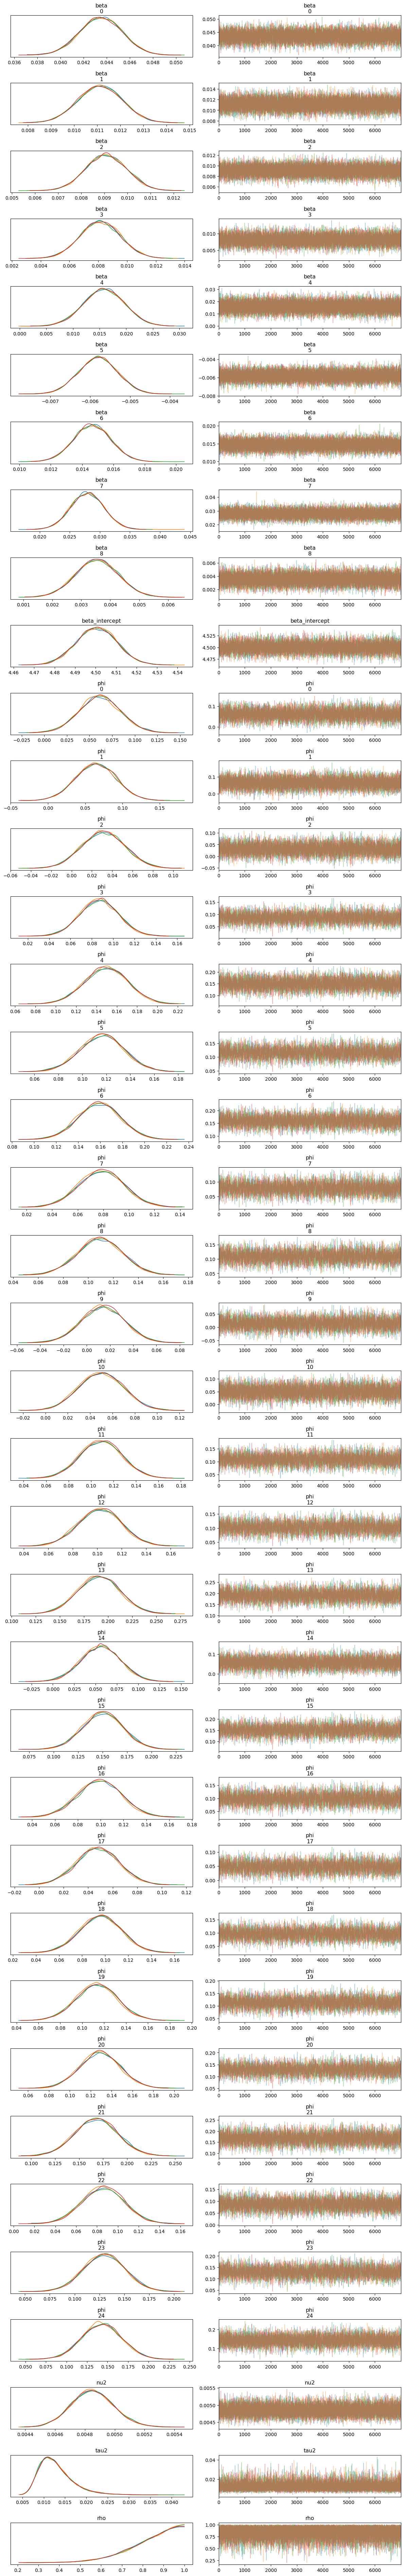

In [40]:
az.plot_trace(cmdstanpy_data2, compact=False)
plt.tight_layout()
plt.show()

In [41]:
np.sum(cmdstanpy_data2.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

In [42]:
fit2.summary()

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpyi8pv706/stansummary-model-c3_7v_26.csv /tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_1.csv /tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_2.csv /tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_3.csv /tmp/tmpyi8pv706/modelktovvonh/model-20230213154127_4.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,5069.890000,0.034320,4.406850,5062.120000,5070.220000,5076.540000,16487.80000,9.194610,1.000010
beta[1],0.043506,0.000016,0.001834,0.040470,0.043507,0.046505,12485.50000,6.962700,1.000090
beta[2],0.011131,0.000006,0.000962,0.009543,0.011132,0.012701,24565.10000,13.699000,0.999900
beta[3],0.009075,0.000006,0.000884,0.007633,0.009067,0.010526,25711.60000,14.338400,1.000080
beta[4],0.008146,0.000012,0.001408,0.005836,0.008136,0.010479,13531.90000,7.546240,1.000170
beta[5],0.015848,0.000024,0.003866,0.009455,0.015826,0.022170,25929.80000,14.460100,1.000030
beta[6],-0.005805,0.000004,0.000486,-0.006603,-0.005803,-0.005007,15396.90000,8.586280,1.000070
beta[7],0.014646,0.000008,0.001192,0.012690,0.014642,0.016602,23720.80000,13.228200,1.000000
beta[8],0.027926,0.000019,0.002743,0.023419,0.027922,0.032479,20018.80000,11.163700,0.999987
beta[9],0.003547,0.000004,0.000740,0.002332,0.003544,0.004767,27410.70000,15.285900,0.999984


In [ ]:
#No 0.95-CI for betas contains zero
#Good mixing and covergence of the chains
#Random effects have modeled a lot of spatial autocorrelation, as the posterior mean for rho is 0.848380
#--> we proceed by computing WAIC for our model

In [43]:
DF = fit2.draws_pd()

In [44]:
DF

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,phi[19],phi[20],phi[21],phi[22],phi[23],phi[24],phi[25],nu2,tau2,rho
0,5073.37,0.840181,0.021551,7.0,127.0,0.0,-5057.76,0.045230,0.011556,0.008693,...,0.135162,0.143133,0.166709,0.195533,0.118345,0.166203,0.172994,0.004956,0.011063,0.862509
1,5067.43,0.996859,0.021551,7.0,255.0,0.0,-5045.03,0.040540,0.013044,0.009773,...,0.112212,0.142010,0.154927,0.201269,0.112363,0.155499,0.167848,0.004964,0.010396,0.996667
2,5065.94,0.999239,0.021551,7.0,191.0,0.0,-5048.36,0.044055,0.011522,0.006815,...,0.115463,0.129427,0.151728,0.185550,0.113321,0.146549,0.149341,0.005027,0.011671,0.598514
3,5072.86,0.999973,0.021551,7.0,127.0,0.0,-5050.39,0.040944,0.011054,0.007176,...,0.099093,0.120943,0.132116,0.181006,0.080755,0.139527,0.159368,0.004921,0.017289,0.949538
4,5070.56,0.960148,0.021551,7.0,127.0,0.0,-5051.14,0.043474,0.010268,0.009708,...,0.102718,0.112937,0.137351,0.185850,0.098688,0.151320,0.148214,0.005126,0.006638,0.988433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,5063.21,0.991841,0.020614,6.0,63.0,0.0,-5050.69,0.040446,0.010222,0.007453,...,0.070706,0.093818,0.111910,0.161758,0.053990,0.110145,0.137394,0.004989,0.012162,0.718056
27996,5073.28,0.839199,0.020614,8.0,383.0,0.0,-5054.16,0.046339,0.009891,0.010029,...,0.097478,0.107392,0.125008,0.156801,0.099466,0.128511,0.130437,0.004906,0.010688,0.924370
27997,5073.26,0.855853,0.020614,7.0,127.0,0.0,-5054.34,0.043380,0.012191,0.007464,...,0.092256,0.112181,0.116626,0.152166,0.088152,0.116392,0.121072,0.004970,0.009696,0.965453
27998,5066.84,0.996479,0.020614,7.0,127.0,0.0,-5052.99,0.044182,0.012590,0.008454,...,0.071937,0.107703,0.116338,0.155692,0.084882,0.140199,0.154917,0.004942,0.010288,0.978965


In [45]:
colname = DF.columns

In [46]:
colname

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'beta[6]', 'beta[7]', 'beta[8]', 'beta[9]', 'beta_intercept',
       'phi[1]', 'phi[2]', 'phi[3]', 'phi[4]', 'phi[5]', 'phi[6]', 'phi[7]',
       'phi[8]', 'phi[9]', 'phi[10]', 'phi[11]', 'phi[12]', 'phi[13]',
       'phi[14]', 'phi[15]', 'phi[16]', 'phi[17]', 'phi[18]', 'phi[19]',
       'phi[20]', 'phi[21]', 'phi[22]', 'phi[23]', 'phi[24]', 'phi[25]', 'nu2',
       'tau2', 'rho'],
      dtype='object')

In [47]:
beta = np.array(DF[colname[7:16]])
beta_intercept = np.array(DF[colname[16]])
phi = np.array(DF[colname[17:42]])
nu2 = np.array(DF[colname[42]])

In [48]:
N = len(X2)
K = 25
T = 28000
rand_eff = np.zeros((K,T))
mu = np.zeros((N,T))
log_fy = np.zeros((N,T))

In [49]:
for l in range(K):
    rand_eff[l,] =  np.transpose(phi)[l,]

In [50]:
for i in range(N):
    mu[i,] = np.transpose(beta_intercept) + np.matmul(X2, np.transpose(beta))[i,] + rand_eff[vector[i]-1,]

In [51]:
nu2_sqrt = np.sqrt(nu2)

In [52]:
for i in range(N):
    log_fy[i,] = np.log( norm.pdf(Y[i], mu[i,], nu2_sqrt) )

In [53]:
mean_log_fy = log_fy.mean(axis=1)

In [54]:
lppd = mean_log_fy.sum()
lppd

2909.8343520289736

In [55]:
var_log_fy = log_fy.var(axis=1)

In [56]:
pW = var_log_fy.sum()
pW

50.413754964488575

In [57]:
WAIC = -2*(lppd-pW)
WAIC

-5718.8411941289705

In [58]:
#PREDICTION

In [59]:
stime = pd.DataFrame(DF.mean())
print(stime)

                          0
lp__            5069.893395
accept_stat__      0.939970
stepsize__         0.022385
treedepth__        6.741786
n_leapfrog__     145.205714
divergent__        0.000000
energy__       -5050.875320
beta[1]            0.043506
beta[2]            0.011131
beta[3]            0.009075
beta[4]            0.008146
beta[5]            0.015848
beta[6]           -0.005805
beta[7]            0.014646
beta[8]            0.027926
beta[9]            0.003547
beta_intercept     4.500430
phi[1]             0.061323
phi[2]             0.064176
phi[3]             0.031288
phi[4]             0.086924
phi[5]             0.149653
phi[6]             0.116645
phi[7]             0.159169
phi[8]             0.078732
phi[9]             0.109523
phi[10]            0.014064
phi[11]            0.049892
phi[12]            0.108969
phi[13]            0.102324
phi[14]            0.190666
phi[15]            0.056207
phi[16]            0.150237
phi[17]            0.099220
phi[18]            0

In [60]:
beta_pred = [0] * 9
for i in range(9):   
    beta_pred[i] = stime.iloc[7+i,0]

beta_pred

[0.04350632946428571,
 0.011131150143928572,
 0.009074906348214286,
 0.0081464326,
 0.01584797901539286,
 -0.005804841413571428,
 0.014645989032499999,
 0.027926041314285718,
 0.0035468988970714286]

In [61]:
phi_pred = [0] * 25
for i in range(25):   
    phi_pred[i] = stime.iloc[17+i,0]

phi_pred

[0.061322716291332145,
 0.06417585113905,
 0.03128799569850964,
 0.08692432207857144,
 0.14965258897857142,
 0.11664542125714288,
 0.15916866506785715,
 0.07873210676428571,
 0.10952263206071429,
 0.01406389109601,
 0.049891749086360716,
 0.10896945023928573,
 0.10232390376785715,
 0.1906661019642857,
 0.0562069065073607,
 0.15023652329285714,
 0.09922006011428573,
 0.04787619530508214,
 0.09614817805357143,
 0.11332244091428573,
 0.129015476525,
 0.1679491982107143,
 0.08591057138964285,
 0.129924403825,
 0.14294692987500002]

In [62]:
beta_intercept_pred = stime.iloc[16,0]
beta_intercept_pred

4.50043021

In [63]:
nu2_pred = stime.iloc[42,0]
nu2_pred

0.004852646588928572

In [65]:
test_data = pd.read_csv("../Dataset/testtransfcoor.csv", sep=';')
indextest = pd.read_csv("indexneigh_test.csv", sep=';')

In [66]:
test_data

,price,Overall.Qual,Garage.Area,Total.Bsmt.SF,X1st.Flr.SF,Full.Bath,AgeofHouse,Mas.Vnr.Area,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Longitude,Latitude,Neighborhood
0,5.245,7,7.707,11.169,11.883,2,1,3.421,7,1,3.587,"-93,641515","42,062557",Blmngtn
1,5.369,7,6.148,11.120,11.838,2,1,1.273,7,1,3.587,"-93,641946","42,063298",Blmngtn
2,5.332,8,6.000,10.704,11.447,2,1,1.897,7,1,3.587,"-93,640287","42,063329",Blmngtn
3,5.258,7,6.413,11.006,11.634,2,1,1.200,7,1,3.747,"-93,642597","42,062266",Blmngtn
4,5.056,6,4.874,7.777,7.777,1,7,4.884,7,0,0.000,"-93,627855","42,052696",BrDale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,5.628,9,9.099,13.342,13.342,2,1,5.109,7,1,5.265,"-93,651703","41,992964",Timber
558,5.477,7,7.125,10.491,10.695,2,4,4.948,7,1,0.000,"-93,661846","42,037652",Veenker
559,5.390,8,6.708,10.649,10.767,1,3,0.000,4,2,3.286,"-93,647655","42,045012",Veenker
560,5.431,8,6.580,11.596,11.596,1,2,0.000,6,1,0.000,"-93,648931","42,044609",Veenker


In [67]:
indextest

,x
0,1
1,1
2,1
3,1
4,3
...,...
557,24
558,25
559,25
560,25


In [68]:
y_test = test_data[['price']]
X_test = test_data[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']]
index = indextest[['x']]

In [69]:
N_test = len(X_test)

In [70]:
y_pred = [0] * N_test
nu2_pred_sqrt = np.sqrt(nu2_pred)

In [94]:
DF.columns
DF.loc[1,DF.columns[17:16+25]]

beta[1]    0.040540
beta[2]    0.013044
beta[3]    0.009773
beta[4]    0.007328
beta[5]    0.015056
beta[6]   -0.006071
beta[7]    0.014396
beta[8]    0.023939
beta[9]    0.003184
Name: 1, dtype: float64

In [99]:
for i in range(N_test):
    sum = 0
    for j in range(DF.shape[0]):
        beta_intercept = DF.loc[j,"beta_intercept"]
        beta = DF.loc[j,DF.columns[7:16]].to_numpy()
        phi = DF.loc[j,DF.columns[16 + index.iloc[i]['x']]]
        nu2 = DF.loc[j, "nu2"]
        sum += np.random.normal(beta_intercept + X_test.iloc[i,:].dot(beta) + phi, nu2)
    y_pred[i] = sum / DF.shape[0]

In [106]:
# Calculate mean squared error in the dollar scale
predictions = np.power(10, y_pred)
correct = np.power(10, y_test['price'])

mse = np.mean((predictions - correct) ** 2)
print("Std error: ", np.sqrt(mse), " $")

Std error:  27064.36845303973  $


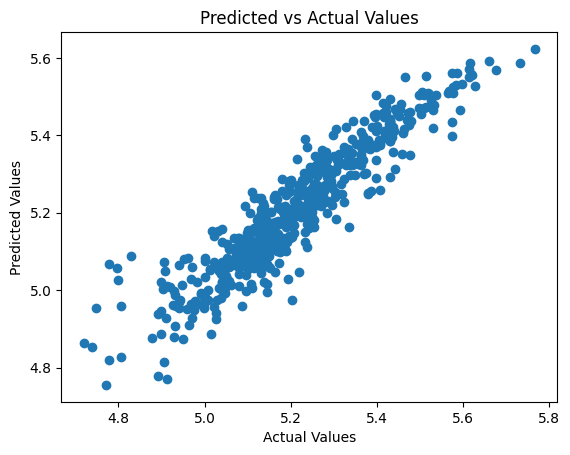

In [107]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

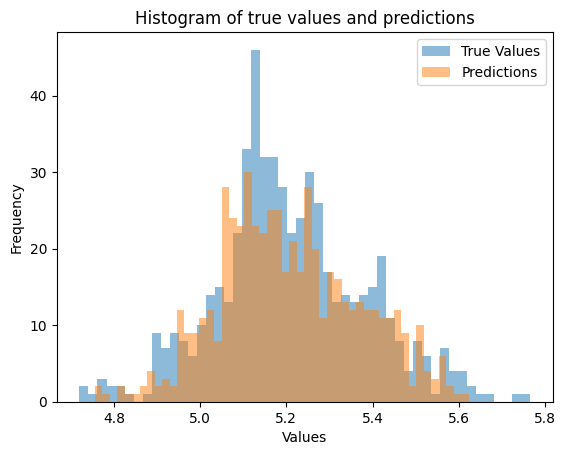

In [108]:
# Histogram
plt.hist(y_test, bins=50, alpha=0.5, label='True Values')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predictions')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of true values and predictions")
plt.legend()
plt.show()

In [109]:
import pickle

In [110]:
with open('stan_car_fit.pickle','wb') as f:
    pickle.dump(fit2,f)